In [52]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


file_name = r'C:\Users\user\Documents\Python\MOKEpy\gui\LoopTaking_20181126-170014.h5'

In [37]:
with h5py.File(file_name, 'r') as file:
    loops = np.array(list(file.get('/loops').keys()))
    loop_nums = np.sort([int(l.split('loop')[1]) for l in loops])


In [38]:
store = pd.HDFStore(file_name, 'r')

In [43]:
woll = store.get('/loops/loop20/wollaston/data')
hp = store.get('/loops/loop20/hallprobe/data')

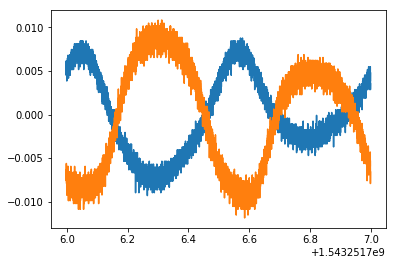

In [44]:
plt.plot(hp.index, woll['s']-np.mean(woll['s']))
plt.plot(hp.index, woll['p']-np.mean(woll['p']))

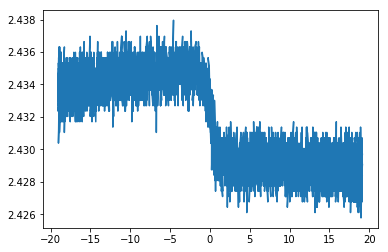

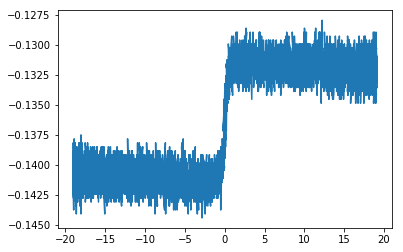

In [8]:
plt.plot(hp['hallprobe_C'], woll['s']-woll['p'])

In [10]:
woll_full = pd.concat((store.get('/loops/loop' + str(ln) + '/wollaston/data') for ln in loop_nums))
hp_full = pd.concat((store.get('/loops/loop' + str(ln) + '/hallprobe/data') for ln in loop_nums))

In [13]:
data_full = pd.concat([woll_full, hp_full], axis=1, sort=False)

In [19]:
fields = np.array(data_full['hallprobe_A'])
bins = np.linspace(np.min(fields), np.max(fields), 500)

In [22]:
field_direction = 'A'

In [23]:
data_full['bins'] = pd.cut(data_full['hallprobe_'+field_direction], bins=bins, right=False)

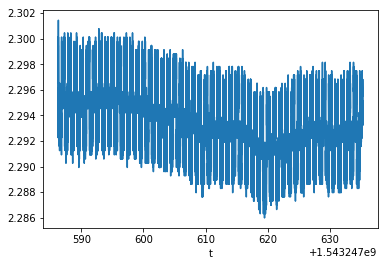

In [24]:
data_full['s'].plot()

In [25]:
data_binned = data_full.groupby('bins').mean()

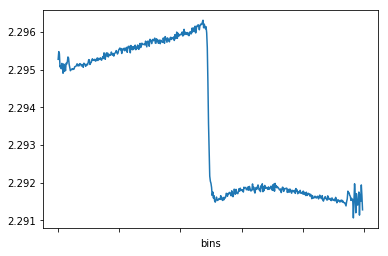

In [26]:
data_binned['s'].plot()

In [29]:
data_binned['diff'] = (data_binned['p']-data_binned['s'])/2
data_binned['sum'] = (data_binned['p']+data_binned['s'])/2

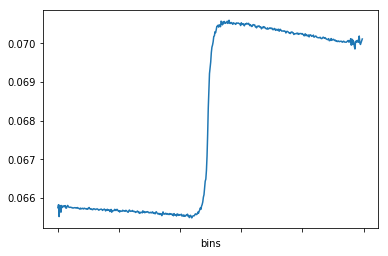

In [30]:
data_binned['diff'].plot()

In [31]:
data_full

,s,p,hallprobe_A,hallprobe_B,hallprobe_C,bins
t,,,,,,
1.543248e+09,2.297497,2.429403,-2.489050,-1.629233,5.026844,"[-2.527, -2.484)"
1.543248e+09,2.297497,2.429403,-2.608210,-1.796547,4.971035,"[-2.613, -2.57)"
1.543248e+09,2.298155,2.429732,-2.653063,-1.845878,4.983227,"[-2.655, -2.613)"
1.543248e+09,2.298484,2.429732,-2.665021,-1.802034,5.003469,"[-2.698, -2.655)"
1.543248e+09,2.298155,2.430390,-2.650788,-1.836118,5.029497,"[-2.655, -2.613)"
1.543248e+09,2.298484,2.429732,-2.472943,-1.775646,4.992129,"[-2.484, -2.442)"
1.543248e+09,2.298155,2.427430,-2.615432,-1.840543,4.897926,"[-2.655, -2.613)"
1.543248e+09,2.299471,2.429732,-2.622831,-1.816174,4.885004,"[-2.655, -2.613)"
1.543248e+09,2.297826,2.430390,-2.669159,-1.684774,4.978595,"[-2.698, -2.655)"


In [56]:
with h5py.File(file_name, 'r') as file:
    loops = np.array(list(file.get('/loops').keys()))
    loop_nums = np.sort([int(l.split('loop')[1]) for l in loops])
with pd.HDFStore(file_name, 'r') as store:
    # stack all the loops
    woll_list = []
    for ln in loop_nums:
        wl = store.get('/loops/loop' + str(ln) + '/wollaston/data')
#         wl.index -= wl.index[0]
        wl.reset_index(inplace=True)
        woll_list.append(wl)
    hp_list = []
    for ln in loop_nums:
        hp = store.get('/loops/loop' + str(ln) + '/hallprobe/data')
#         hp.index -= hp.index[0]
        hp.reset_index(inplace=True)
        hp_list.append(hp)
    woll_full = pd.concat(woll_list)
    hp_full = pd.concat(hp_list)
    hp_full.drop(columns=['t'], inplace=True)

    # combine the data
    data_full = pd.concat([woll_full, hp_full], axis=1, sort=False)
    t = np.array(data_full['t'])
    bins = np.linspace(np.min(t), np.max(t), 1000)
    data_full['bins'] = pd.cut(data_full['t'], bins=bins, right=False)

    # bin in magnetic fields and stack
    data_binned = data_full.groupby('bins').mean().reset_index()
    data_binned.dropna(inplace=True)

    data_binned['diff'] = (data_binned['p']-data_binned['s'])/2
    data_binned['sum'] = (data_binned['p']+data_binned['s'])/2


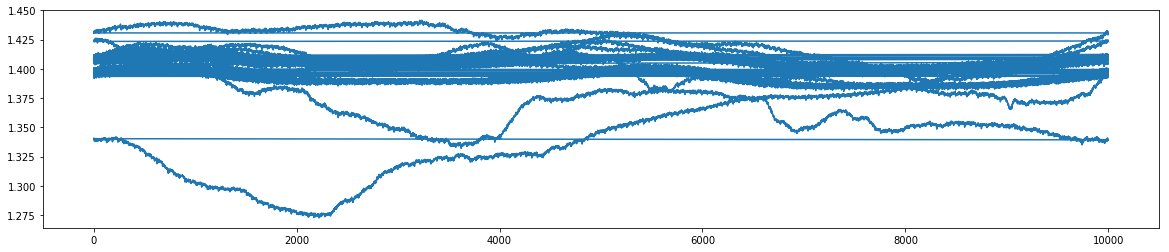

In [57]:
# woll_full['p'].plot(figsize=(20, 4))